In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from keras.preprocessing.image import ImageDataGenerator
import bcolz
import random

# Any results you write to the current directory are saved as output.

['test', 'labels.csv', 'sample_submission.csv', 'train']


Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('../input/labels.csv')

In [3]:
df_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [6]:
im_size=300
x_train = bcolz.zeros((0,im_size,im_size,3),np.float32)
y_train =[]

In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tqdm import tqdm

In [7]:
for i,j in tqdm(df_train.values):
    image = load_img('../input/train/{}.jpg'.format(i), target_size=(im_size, im_size))
    x_train.append(img_to_array(image))
    y_train.append(j)

100%|██████████| 10222/10222 [01:02<00:00, 164.79it/s]


In [8]:
len(y_train)

10222

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [10]:
batch_size=2
resize_factor=0.8

In [23]:
idx=np.arange(1,1023)
np.random.shuffle(idx)
idx

array([192, 423, 610, ..., 483, 119, 131])

In [167]:
def augmentation(X,Y,list_id,batch_size=2):
    datagen = ImageDataGenerator()
    temp = np.zeros((2,int(im_size*0.8),int(im_size*0.8),3),dtype=np.float32)
    temp1= np.zeros((2,int(im_size*0.8),int(im_size*0.8),3),dtype=np.float32)
    image_to_test = np.random.randint(0,1022)
    im=list_id[image_to_test*batch_size:(image_to_test+1)*batch_size]    
    def plotImages( images_arr, n_images=2):
        fig, axes = plt.subplots(n_images, figsize=(12,12))
        axes = axes.flatten()
        for img, ax in zip( images_arr, axes):
            ax.imshow(img)
            ax.set_xticks(())
            ax.set_yticks(())
        plt.tight_layout()
    for i,ids in enumerate(im):
        if random.randint(1,101)<20:
            print("Top Left Crop")
            temp[i]=X[ids,0:240,0:240,:]
        elif random.randint(1,101)<40:
            print("Bottom Left Crop")
            temp[i]=X[ids,60:300,0:240,:]
        elif random.randint(1,101)<60:
            print("Top Right Crop")
            temp[i]=X[ids,0:240,60:300,:]
        elif random.randint(1,101)<80:
            print("Bottom Right Crop")
            temp[i]=X[ids,60:300,60:300,:]
        else:
            print("Center Crop")
            temp[i]=X[ids,30:270,30:270,:]
        for k in range(2):   
            if random.randint(1,101) < 50: 
                flip_horizontal = True
            else:
                flip_horizontal = False
            if random.randint(1,101) < 50: 
                flip_vertical = True
            else:
                flip_vertical = False
            """tx = im_size*random.randint(1,10)/100.0
            ty = im_size*random.randint(1,10)/100.0
            shear = random.randint(1,10)/100.0
            zx = random.randint(80,120)/100.0
            zy = random.randint(80,120)/100.0
            brightness = random.randint(1,2)/100.0
            channel_shift_intensity = random.randint(1,10)/100.0"""
            
            temp1[k] = datagen.apply_transform(temp[i],{
                """'tx':tx,
                'ty':ty,
                'shear':shear,
                'zx':zx,
                'zy':zy,"""
                'flip_horizontal':flip_horizontal,
                'flip_vertical':flip_vertical
                
                #'brightness':brightness,
                #'channel_shift_intensity':channel_shift_intensity
                })
            plt.title(Y[ids])
            plt.imshow(X[ids,]/255.0)
        plotImages(temp1[:,]/255.0)
            

Bottom Right Crop
Bottom Left Crop


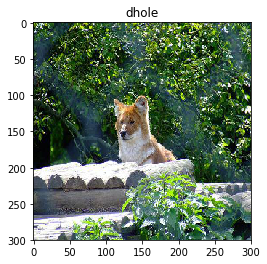

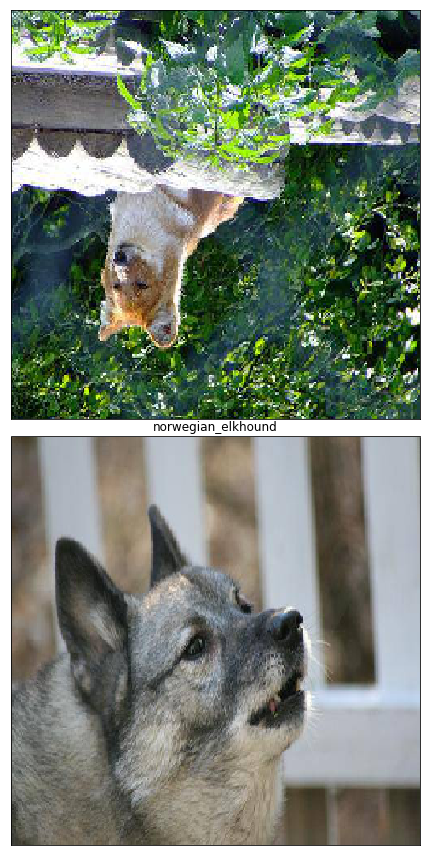

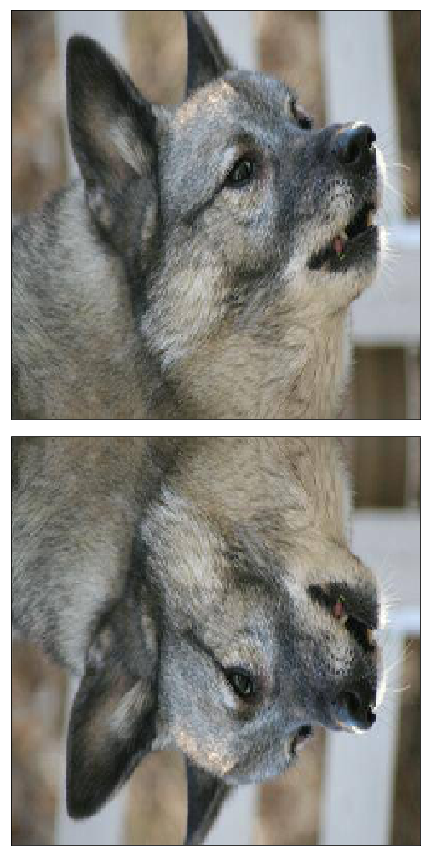

In [178]:
augmentation(x_train,y_train,idx)